In [1]:
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import math
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm

Length of x: torch.Size([500, 1])
Length of y: torch.Size([500, 1])


Text(0, 0.5, 'Dependent variable')

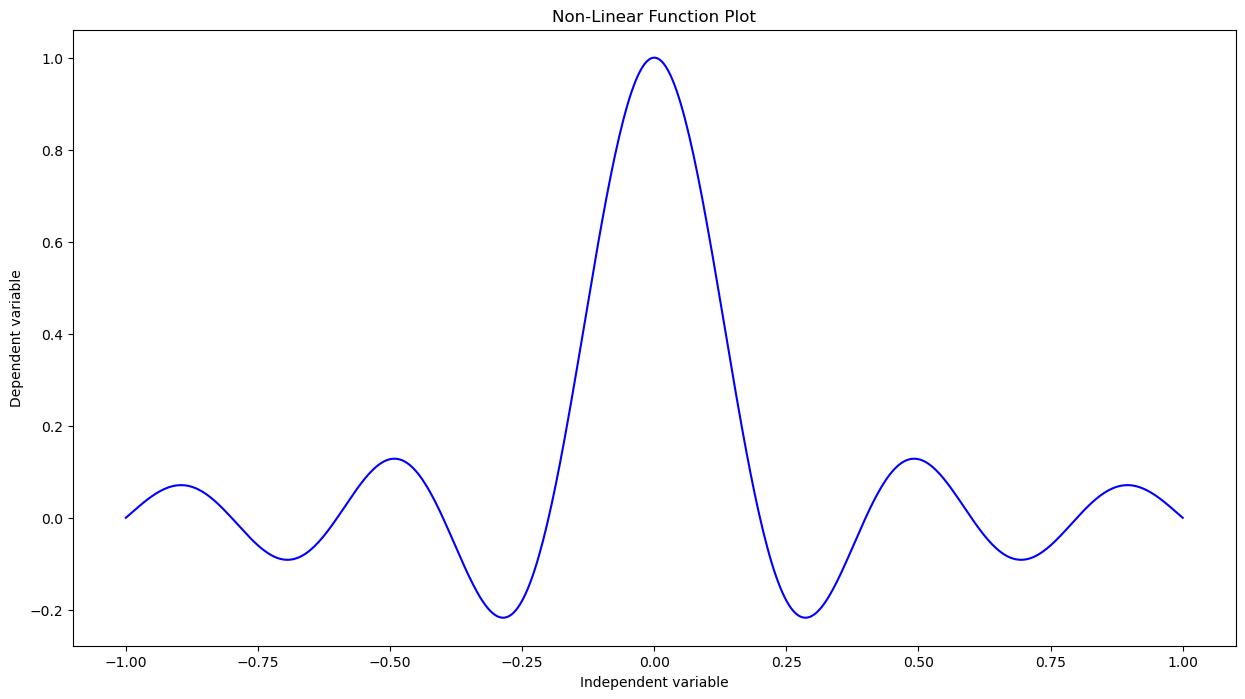

In [2]:

x = torch.unsqueeze(torch.linspace(-1, 1, 500), dim=1)


y = (np.sin(5*np.pi*x))/(5*np.pi*x)

print('Length of x:',x.shape)
print('Length of y:',y.shape)
plt.figure(figsize=(15,8))
plt.plot(x, y, color = "blue")
plt.title('Non-Linear Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')

In [3]:
class FunctionRegressorDeep(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(1,5)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(5,10)
        self.act2 = nn.ReLU()
        self.hidden3 = nn.Linear(10,10)
        self.act3 = nn.ReLU()
        self.hidden4 = nn.Linear(10,10)
        self.act4 = nn.ReLU()
        self.hidden5 = nn.Linear(10,10)
        self.act5 = nn.ReLU()
        self.hidden6 = nn.Linear(10,10)
        self.act6 = nn.ReLU()
        self.hidden7 = nn.Linear(10,5)
        self.act7 = nn.ReLU()
        self.output = nn.Linear(5,1)
        
    def forward(self,x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act3(self.hidden3(x))
        x = self.act4(self.hidden4(x))
        x = self.act5(self.hidden5(x))
        x = self.act6(self.hidden6(x))
        x = self.act7(self.hidden7(x))
        x = self.output(x)
        return x
    
#Defining "Deep" model
model0 = FunctionRegressorDeep()
#print(model0)

optimizer = torch.optim.Adam(model0.parameters(), lr=0.001, weight_decay = 0.0001)
#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()

summation=[]

for j in model0.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 0:', np.sum(summation),)        

Number of parameters in Model 0: 571


In [4]:
def testing(model,x,y):
    max_epoch = 20000
    epoch_array = []
    loss_array = []
    epoch = 0
    not_converged = True
    
    while(not_converged):
        
        prediction = model(x)
        loss = loss_function(prediction,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_array.append(epoch)
        loss_array.append(loss.detach().numpy())
        
        epoch = epoch + 1
        
        if epoch % 100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == max_epoch:
                print("Reached to Maxmum number of Epoch")
                not_converged = False
        elif (epoch > 5) and  (loss_array[-1] < 0.001):
            if abs(loss_array[-3] - loss_array[-2]) < 1.0e-05 and abs(loss_array[-2] - loss_array[-1]) < 0.0001:
                print("Converged:",loss_array[-1])
                not_converged = False
                
    return epoch_array,loss_array,prediction

In [5]:
x = torch.tensor(x, dtype=torch.float32) 
y = torch.tensor(y, dtype=torch.float32)

/local_scratch/slurm.687448/ipykernel_1660168/2067748302.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
/local_scratch/slurm.687448/ipykernel_1660168/2067748302.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [6]:
FunctionRegressorDeepepoch_array,FunctionRegressorDeeploss_array,FunctionRegressorDeepprediction = testing(model0,x,y)

epoch: 100, loss = 0.0870
epoch: 200, loss = 0.0864
epoch: 300, loss = 0.0651
epoch: 400, loss = 0.0132
epoch: 500, loss = 0.0056
epoch: 600, loss = 0.0047
epoch: 700, loss = 0.0028
epoch: 800, loss = 0.0025
epoch: 900, loss = 0.0025
epoch: 1000, loss = 0.0024
epoch: 1100, loss = 0.0019
epoch: 1200, loss = 0.0011
Converged: 0.0009815637


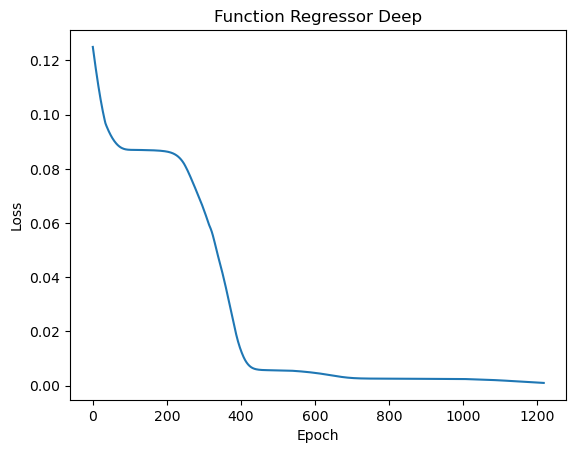

In [7]:
plt.plot(FunctionRegressorDeepepoch_array, FunctionRegressorDeeploss_array)
plt.title('Function Regressor Deep')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

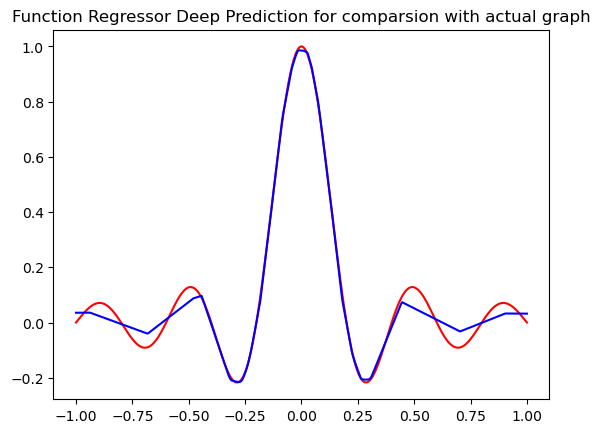

In [8]:
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,FunctionRegressorDeepprediction.data.numpy(),color="blue")
plt.title('Function Regressor Deep Prediction for comparsion with actual graph')
plt.show()

In [9]:
class FunctionRegressorModerate(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hidden1 = nn.Linear(1, 10)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(10, 18)
        self.act2 = nn.ReLU()
        self.hidden3 = nn.Linear(18, 15)
        self.act3 = nn.ReLU()
        self.hidden4 = nn.Linear(15, 4)
        self.act4 = nn.ReLU()
        # output layer
        self.output = nn.Linear(4, 1)   


        
    def forward(self,x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act3(self.hidden3(x))
        x = self.act4(self.hidden4(x))
        x = self.output(x)
        return x
    
#Defining "Deep" model
model1 = FunctionRegressorModerate()
#print(model1)

optimizer = torch.optim.Adam(model1.parameters(), lr=0.005, weight_decay = 0.00015)
#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()

summation=[]

for j in model1.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 1:', np.sum(summation),)        

Number of parameters in Model 1: 572


In [10]:
FunctionRegressorModerateepoch_array,FunctionRegressorModerateloss_array,FunctionRegressorModerateprediction = testing(model1,x,y)

epoch: 100, loss = 0.0049
epoch: 200, loss = 0.0024
Converged: 0.000976982


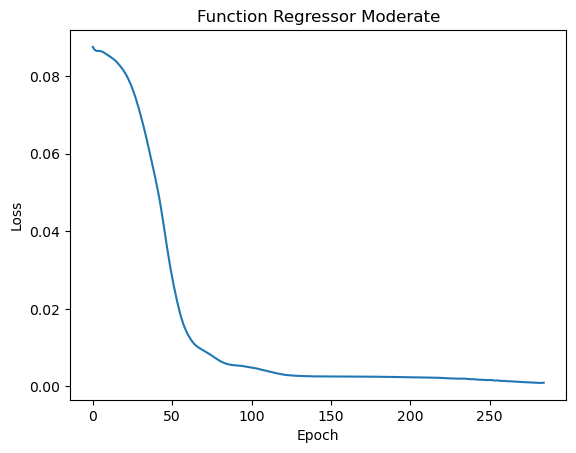

In [11]:
plt.plot(FunctionRegressorModerateepoch_array, FunctionRegressorModerateloss_array)
plt.title('Function Regressor Moderate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

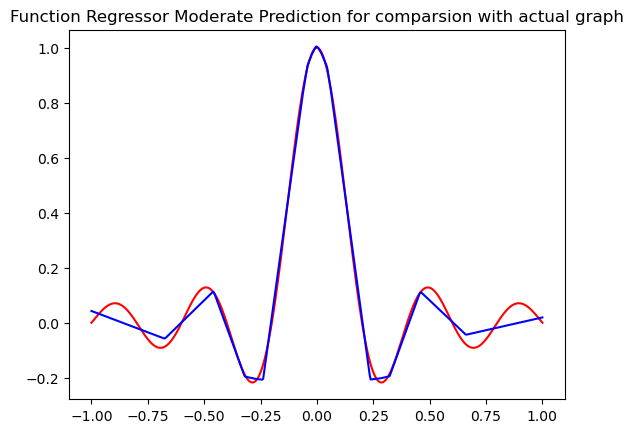

In [12]:
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,FunctionRegressorModerateprediction.data.numpy(),color="blue")
plt.title('Function Regressor Moderate Prediction for comparsion with actual graph')
plt.show()

In [13]:
class FunctionRegressorShallow(nn.Module):
    def __init__(self,):
        super().__init__()
        self.hidden = nn.Linear(1, 190)
        self.act1 = nn.ReLU()
        self.output = nn.Linear(190, 1)
        
    def forward(self, x):
        x = self.act1(self.hidden(x))
        x = self.output(x)
        return x
        

model2 = FunctionRegressorShallow()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.001, weight_decay = 0.0001)

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model2.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 3:', np.sum(summation),)

Number of parameters in Model 3: 571


In [14]:
FunctionRegressorShallowepoch_array,FunctionRegressorShallowloss_array,FunctionRegressorShallowprediction = testing(model2,x,y)

epoch: 100, loss = 0.0609
epoch: 200, loss = 0.0442
epoch: 300, loss = 0.0310
epoch: 400, loss = 0.0206
epoch: 500, loss = 0.0138
epoch: 600, loss = 0.0098
epoch: 700, loss = 0.0076
epoch: 800, loss = 0.0063
epoch: 900, loss = 0.0056
epoch: 1000, loss = 0.0050
epoch: 1100, loss = 0.0046
epoch: 1200, loss = 0.0043
epoch: 1300, loss = 0.0039
epoch: 1400, loss = 0.0037
epoch: 1500, loss = 0.0034
epoch: 1600, loss = 0.0032
epoch: 1700, loss = 0.0030
epoch: 1800, loss = 0.0028
epoch: 1900, loss = 0.0026
epoch: 2000, loss = 0.0025
epoch: 2100, loss = 0.0023
epoch: 2200, loss = 0.0022
epoch: 2300, loss = 0.0020
epoch: 2400, loss = 0.0019
epoch: 2500, loss = 0.0018
epoch: 2600, loss = 0.0017
epoch: 2700, loss = 0.0016
epoch: 2800, loss = 0.0015
epoch: 2900, loss = 0.0014
epoch: 3000, loss = 0.0013
epoch: 3100, loss = 0.0013
epoch: 3200, loss = 0.0012
epoch: 3300, loss = 0.0012
epoch: 3400, loss = 0.0011
epoch: 3500, loss = 0.0011
epoch: 3600, loss = 0.0010
Converged: 0.0009991996


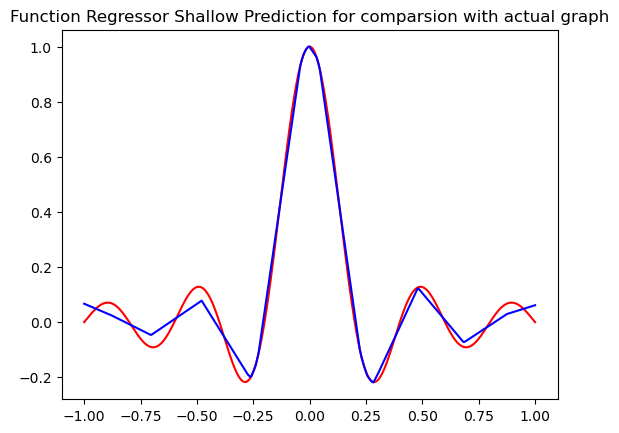

In [15]:
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,FunctionRegressorShallowprediction.data.numpy(),color="blue")
plt.title('Function Regressor Shallow Prediction for comparsion with actual graph')
plt.show()

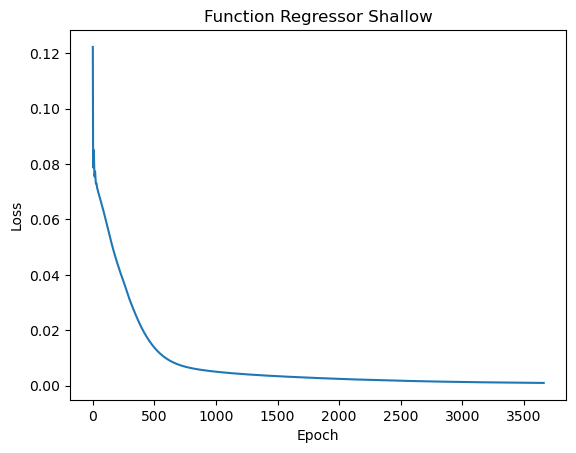

In [16]:
plt.plot(FunctionRegressorShallowepoch_array, FunctionRegressorShallowloss_array)
plt.title('Function Regressor Shallow')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

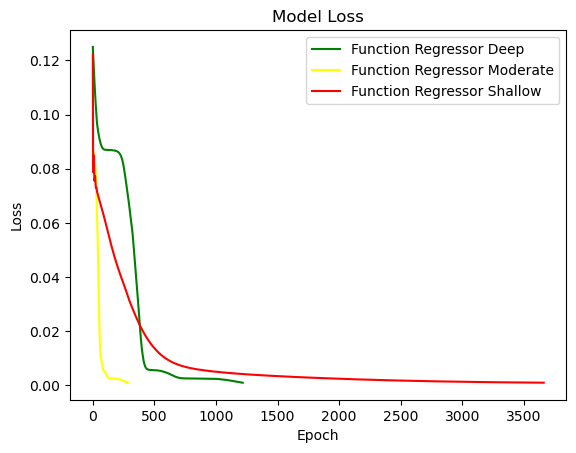

In [19]:
plt.plot(FunctionRegressorDeepepoch_array,FunctionRegressorDeeploss_array, color = "green")
plt.plot(FunctionRegressorModerateepoch_array,FunctionRegressorModerateloss_array, color = "yellow")
plt.plot(FunctionRegressorShallowepoch_array,FunctionRegressorShallowloss_array, color = "red")
plt.title('Model Loss')
plt.legend(['Function Regressor Deep', 'Function Regressor Moderate','Function Regressor Shallow'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('lossepoch.png')
plt.show()

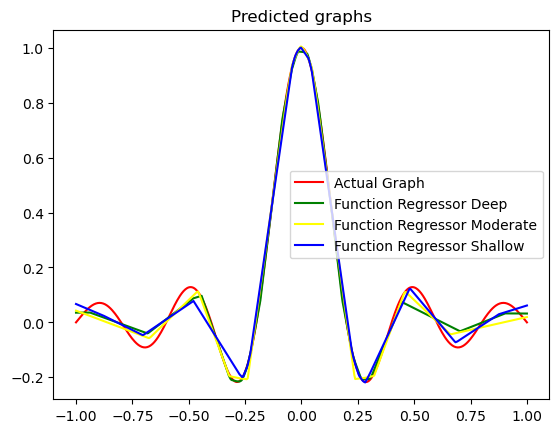

In [20]:
plt.plot(x.numpy(),y.numpy(),color="red")

plt.plot(x,FunctionRegressorDeepprediction.data.numpy(),color="green")
plt.plot(x,FunctionRegressorModerateprediction.data.numpy(),color="yellow")
plt.plot(x,FunctionRegressorShallowprediction.data.numpy(),color="blue")
plt.title('Predicted graphs')
plt.legend(['Actual Graph', 'Function Regressor Deep', 'Function Regressor Moderate','Function Regressor Shallow'])
plt.savefig('Predicted Graphs.png')
plt.show()